In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [40]:
Data = pd.read_csv('W.csv')
Data.reset_index(drop=True, inplace=True)
Data=pd.DataFrame(Data)
datetime_series = pd.to_datetime(Data['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Data=Data.set_index(datetime_index)
Data.drop('Date',axis=1,inplace=True)
Data.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,124.39,132.46,125.93,143.85,101.57,118.35,16.6991,112.35,2.5766,3.3116,...,107.95,1.201,1076.21,114.32,116.33,1.5334,146.37,29.97,1.779,107.9620
2020-01-12,124.39,132.46,125.93,143.85,101.57,118.35,16.8738,112.35,2.5808,3.3167,...,107.95,1.201,1076.21,114.32,117.05,1.5345,146.42,29.32,1.764,107.9444
2020-01-19,125.93,132.19,126.97,144.87,102.16,116.12,16.6996,112.33,2.5811,3.3174,...,107.58,1.203,1087.01,114.97,116.80,1.5310,146.87,30.00,1.804,108.6293
2020-01-26,125.93,132.19,126.97,144.87,102.16,116.12,16.8233,112.33,2.5871,3.3203,...,107.58,1.204,1087.01,114.97,116.74,1.5408,147.04,29.84,1.819,108.6894
2020-02-02,125.93,132.19,126.97,144.87,102.16,116.12,16.9853,112.33,2.5927,3.3325,...,107.58,1.212,1087.01,115.36,117.38,1.5415,146.93,29.95,1.793,108.4216


In [41]:
# Log of percentage change of all stocks in the list
Ret= Data.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-12,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.010407,0.000000,0.001629,0.001539,...,0.000000,0.000000,0.000000,0.000000,0.006170,0.000717,0.000342,-0.021927,-0.008467,-0.000163
2020-01-19,0.012304,-0.00204,0.008225,0.007066,0.005792,-0.019022,-0.010377,-0.000178,0.000116,0.000211,...,-0.003433,0.001664,0.009985,0.005670,-0.002138,-0.002283,0.003069,0.022928,0.022422,0.006325
2020-01-26,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.007380,0.000000,0.002322,0.000874,...,0.000000,0.000831,0.000000,0.000000,-0.000514,0.006381,0.001157,-0.005348,0.008280,0.000553
2020-02-02,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.009583,0.000000,0.002162,0.003668,...,0.000000,0.006623,0.000000,0.003386,0.005467,0.000454,-0.000748,0.003680,-0.014397,-0.002467


In [42]:
Ann_Ret = Ret.mean()*52
print (Ann_Ret)

PFGDAAU LX Equity    0.210002
PFTEAAU LX Equity    0.155346
PFCSAAU LX Equity    0.154340
PFARAAU LX Equity    0.148201
PFBKAAU LX Equity    0.139987
PFGOAAU LX Equity    0.124551
AIBALMA AB Equity    0.164994
LODFUIA LX Equity    0.020183
CCASORI MK Equity    0.077905
CCASLTF MK Equity    0.075863
BBFTOP3 KY Equity    0.059322
CRLCBUU LX Equity    0.047072
BCUSDLF KK Equity    0.007076
GMFDEBI LE Equity    0.009849
PGPGIFA ID Equity    0.061577
BLUESPH BM Equity    0.056085
PFGLAAU LX Equity    0.090445
ALPCRDA LX Equity    0.091994
ALCONGP AB Equity    0.051767
UBSFLBI LX Equity    0.022493
BUTIBLI KY Equity    0.135671
PGPCBFA ID Equity    0.186455
SCHGTRA LX Equity    0.094031
dtype: float64


In [43]:
Ann_Risk=Ret.std()*(52)**(0.5)
print(Ann_Risk)

PFGDAAU LX Equity    0.086571
PFTEAAU LX Equity    0.053876
PFCSAAU LX Equity    0.057654
PFARAAU LX Equity    0.057355
PFBKAAU LX Equity    0.062312
PFGOAAU LX Equity    0.066725
AIBALMA AB Equity    0.052010
LODFUIA LX Equity    0.006843
CCASORI MK Equity    0.016388
CCASLTF MK Equity    0.016577
BBFTOP3 KY Equity    0.011316
CRLCBUU LX Equity    0.017065
BCUSDLF KK Equity    0.002373
GMFDEBI LE Equity    0.005989
PGPGIFA ID Equity    0.022152
BLUESPH BM Equity    0.046774
PFGLAAU LX Equity    0.039963
ALPCRDA LX Equity    0.027841
ALCONGP AB Equity    0.043235
UBSFLBI LX Equity    0.013572
BUTIBLI KY Equity    0.080982
PGPCBFA ID Equity    0.149274
SCHGTRA LX Equity    0.046193
dtype: float64


In [44]:
Ret_Covar = Ret.cov()
#print(Ret_Covar)



In [45]:
# Yearly returns for individual companies
ind_er = Data.resample('Y').last().pct_change().mean()
ind_er

PFGDAAU LX Equity    0.257214
PFTEAAU LX Equity    0.189279
PFCSAAU LX Equity    0.189103
PFARAAU LX Equity    0.159707
PFBKAAU LX Equity    0.161928
PFGOAAU LX Equity    0.151325
AIBALMA AB Equity    0.087538
LODFUIA LX Equity    0.016303
CCASORI MK Equity    0.050163
CCASLTF MK Equity    0.052983
BBFTOP3 KY Equity    0.049901
CRLCBUU LX Equity    0.031887
BCUSDLF KK Equity    0.004608
GMFDEBI LE Equity    0.004845
PGPGIFA ID Equity    0.030675
BLUESPH BM Equity   -0.008243
PFGLAAU LX Equity    0.052771
ALPCRDA LX Equity    0.008722
ALCONGP AB Equity    0.023065
UBSFLBI LX Equity   -0.000786
BUTIBLI KY Equity    0.035599
PGPCBFA ID Equity    0.022068
SCHGTRA LX Equity    0.008788
dtype: float64

In [46]:
Ret_Corr = Ret.corr()
#print(Ret_Corr)

In [47]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = Data.pct_change().apply(lambda x: np.log(1+x)).cov()
#cov_matrix


In [48]:
Data.columns


Index(['PFGDAAU LX Equity', 'PFTEAAU LX Equity', 'PFCSAAU LX Equity',
       'PFARAAU LX Equity', 'PFBKAAU LX Equity', 'PFGOAAU LX Equity',
       'AIBALMA AB Equity', 'LODFUIA LX Equity', 'CCASORI MK Equity',
       'CCASLTF MK Equity', 'BBFTOP3 KY Equity', 'CRLCBUU LX Equity',
       'BCUSDLF KK Equity', 'GMFDEBI LE Equity', 'PGPGIFA ID Equity',
       'BLUESPH BM Equity', 'PFGLAAU LX Equity', 'ALPCRDA LX Equity',
       'ALCONGP AB Equity', 'UBSFLBI LX Equity', 'BUTIBLI KY Equity',
       'PGPCBFA ID Equity', 'SCHGTRA LX Equity'],
      dtype='object')

In [49]:
Ret_risk=(Ann_Ret/Ann_Risk)
print(Ret_risk)

PFGDAAU LX Equity    2.425769
PFTEAAU LX Equity    2.883400
PFCSAAU LX Equity    2.677020
PFARAAU LX Equity    2.583923
PFBKAAU LX Equity    2.246538
PFGOAAU LX Equity    1.866636
AIBALMA AB Equity    3.172365
LODFUIA LX Equity    2.949239
CCASORI MK Equity    4.753824
CCASLTF MK Equity    4.576345
BBFTOP3 KY Equity    5.242223
CRLCBUU LX Equity    2.758347
BCUSDLF KK Equity    2.982097
GMFDEBI LE Equity    1.644473
PGPGIFA ID Equity    2.779728
BLUESPH BM Equity    1.199068
PFGLAAU LX Equity    2.263234
ALPCRDA LX Equity    3.304219
ALCONGP AB Equity    1.197332
UBSFLBI LX Equity    1.657342
BUTIBLI KY Equity    1.675332
PGPCBFA ID Equity    1.249082
SCHGTRA LX Equity    2.035596
dtype: float64


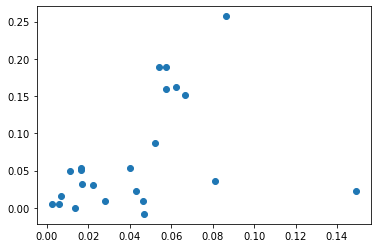

In [50]:
x=Ann_Risk
y=ind_er
plt.scatter(x,y)
plt.show()

In [51]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Return Risk Ratio']
assets

,Ann Returns,Ann Risk,Return Risk Ratio
PFGDAAU LX Equity,0.210002,0.086571,2.425769
PFTEAAU LX Equity,0.155346,0.053876,2.883400
PFCSAAU LX Equity,0.154340,0.057654,2.677020
PFARAAU LX Equity,0.148201,0.057355,2.583923
PFBKAAU LX Equity,0.139987,0.062312,2.246538
PFGOAAU LX Equity,0.124551,0.066725,1.866636
AIBALMA AB Equity,0.164994,0.052010,3.172365
LODFUIA LX Equity,0.020183,0.006843,2.949239
CCASORI MK Equity,0.077905,0.016388,4.753824
CCASLTF MK Equity,0.075863,0.016577,4.576345


<AxesSubplot:>

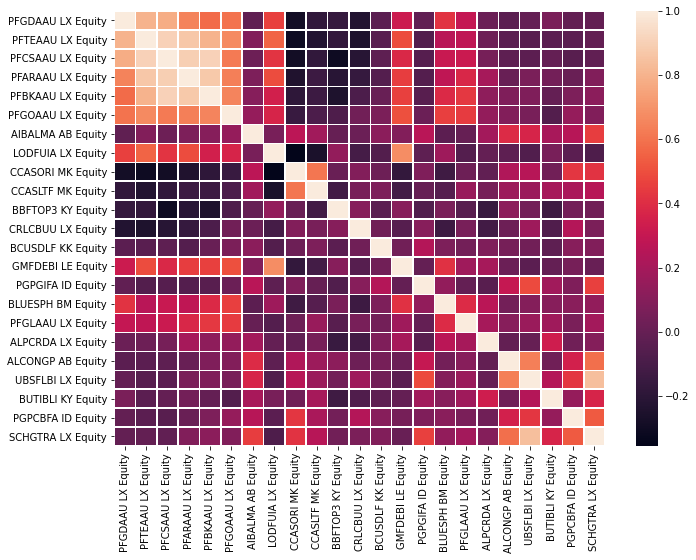

In [52]:
plt.subplots(figsize=(11, 8))
sb.heatmap(Ret_Corr, linewidths=.5, )

In [53]:
w = [0.043]*23
#w = {'PFGDAAU LX Equity':0.043, 'PFTEAAU LX Equity':0.043, 'PFCSAAU LX Equity':0.043, 'PFARAAU LX Equity':0.043, 'PFBKAAU LX Equity':0.043, 'PFGOAAU LX Equity':0.043, 'AIBALMA AB Equity':0.043, 'LODFUIA LX Equity':0.043, 'CCASORI MK Equity':0.043, 'CCASLTF MK Equity':0.043, 'BBFTOP3 KY Equity':0.043, 'CRLCBUU LX Equity':0.043, 'BCUSDLF KK Equity':0.043, 'GMFDEBI LE Equity':0.043,'PGPGIFA ID Equity':0.043, 'BLUESPH BM Equity':0.043, 'PFGLAAU LX Equity':0.043, 'ALPCRDA LX Equity':0.043, 'ALCONGP AB Equity':0.043, 'UBSFLBI LX Equity':0.043, 'BUTIBLI KY Equity':0.043, 'PGPCBFA ID Equity':0.043, 'SCHGTRA LX Equity':0.043} 
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*52)

8.713449400376805e-06
0.0004530993688195939


In [54]:
Ann_port_std

0.021286130902998645

In [55]:
w = [0.043]*23
port_er = (w*Ann_Ret).sum()
port_er

0.09396395800212695

In [56]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(Data.columns)
num_portfolios = 5000

In [57]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [58]:
data = {'Returns':p_ret, 'Risk':p_vol}
for counter, symbol in enumerate(Data.columns.tolist()):
#print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Risk,PFGDAAU LX Equity weight,PFTEAAU LX Equity weight,PFCSAAU LX Equity weight,PFARAAU LX Equity weight,PFBKAAU LX Equity weight,PFGOAAU LX Equity weight,AIBALMA AB Equity weight,LODFUIA LX Equity weight,...,GMFDEBI LE Equity weight,PGPGIFA ID Equity weight,BLUESPH BM Equity weight,PFGLAAU LX Equity weight,ALPCRDA LX Equity weight,ALCONGP AB Equity weight,UBSFLBI LX Equity weight,BUTIBLI KY Equity weight,PGPCBFA ID Equity weight,SCHGTRA LX Equity weight
0,0.098812,0.022845,0.052135,0.016024,0.016681,0.064849,0.048650,0.008358,0.074680,0.070911,...,0.064758,0.062669,0.048388,0.057686,0.053746,0.021742,0.018838,0.056603,0.074217,0.015247
1,0.091008,0.020113,0.023170,0.030985,0.005430,0.005419,0.073520,0.085298,0.022117,0.051946,...,0.052330,0.036161,0.002576,0.081790,0.107938,0.024938,0.018390,0.006631,0.052572,0.034842
2,0.104680,0.025711,0.036366,0.027667,0.023216,0.075597,0.057224,0.050781,0.088370,0.062018,...,0.014614,0.037046,0.059907,0.034484,0.040476,0.016148,0.090172,0.049184,0.061865,0.077396
3,0.098566,0.021269,0.041469,0.040149,0.045777,0.053796,0.047970,0.056215,0.011798,0.016264,...,0.038353,0.060602,0.018544,0.066663,0.067289,0.022664,0.021345,0.062533,0.023824,0.056884
4,0.095465,0.022964,0.001089,0.039442,0.016495,0.073915,0.067049,0.046189,0.044778,0.035063,...,0.040946,0.084821,0.068210,0.054616,0.000416,0.057901,0.017428,0.083663,0.035762,0.075692


<AxesSubplot:xlabel='Risk', ylabel='Returns'>

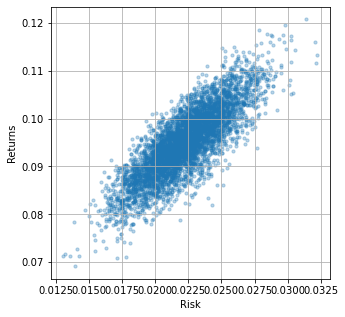

In [59]:
portfolios.plot.scatter(x='Risk', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [60]:
min_vol_port = portfolios.iloc[portfolios['Risk'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns                     0.071290
Risk                        0.013075
PFGDAAU LX Equity weight    0.022367
PFTEAAU LX Equity weight    0.059757
PFCSAAU LX Equity weight    0.068142
PFARAAU LX Equity weight    0.008218
PFBKAAU LX Equity weight    0.013905
PFGOAAU LX Equity weight    0.012393
AIBALMA AB Equity weight    0.011510
LODFUIA LX Equity weight    0.082664
CCASORI MK Equity weight    0.065503
CCASLTF MK Equity weight    0.038604
BBFTOP3 KY Equity weight    0.085145
CRLCBUU LX Equity weight    0.064446
BCUSDLF KK Equity weight    0.092867
GMFDEBI LE Equity weight    0.030040
PGPGIFA ID Equity weight    0.072388
BLUESPH BM Equity weight    0.024126
PFGLAAU LX Equity weight    0.001893
ALPCRDA LX Equity weight    0.058049
ALCONGP AB Equity weight    0.078550
UBSFLBI LX Equity weight    0.067027
BUTIBLI KY Equity weight    0.005745
PGPCBFA ID Equity weight    0.003520
SCHGTRA LX Equity weight    0.033139
Name: 3345, dtype: float64

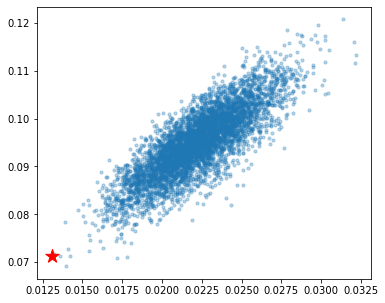

In [61]:
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [62]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risk']).idxmax()]
optimal_risky_port

Returns                     0.078447
Risk                        0.013885
PFGDAAU LX Equity weight    0.031512
PFTEAAU LX Equity weight    0.031536
PFCSAAU LX Equity weight    0.009377
PFARAAU LX Equity weight    0.019273
PFBKAAU LX Equity weight    0.039004
PFGOAAU LX Equity weight    0.028347
AIBALMA AB Equity weight    0.018503
LODFUIA LX Equity weight    0.074484
CCASORI MK Equity weight    0.071068
CCASLTF MK Equity weight    0.044733
BBFTOP3 KY Equity weight    0.092980
CRLCBUU LX Equity weight    0.074881
BCUSDLF KK Equity weight    0.000831
GMFDEBI LE Equity weight    0.087504
PGPGIFA ID Equity weight    0.057398
BLUESPH BM Equity weight    0.020752
PFGLAAU LX Equity weight    0.051584
ALPCRDA LX Equity weight    0.101789
ALCONGP AB Equity weight    0.002949
UBSFLBI LX Equity weight    0.046481
BUTIBLI KY Equity weight    0.032198
PGPCBFA ID Equity weight    0.000437
SCHGTRA LX Equity weight    0.062379
Name: 2749, dtype: float64

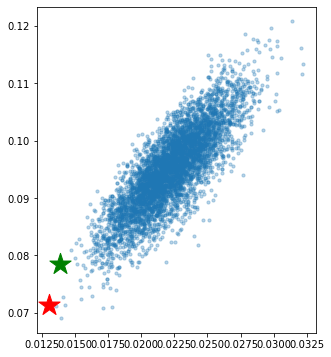

In [63]:
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [64]:
Ret_Corr.to_csv(r'Correlation Matrix .csv')

PermissionError: [Errno 13] Permission denied: 'Correlation Matrix .csv'

In [65]:
Data.to_csv(r'Dataset.csv')